       pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196           

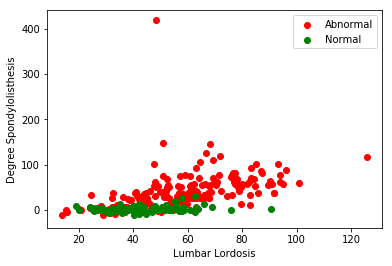

None
KNN accuracy according to K=3 is : 0.7741935483870968


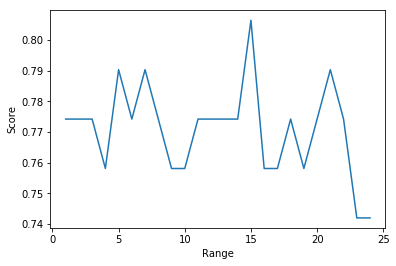

None
KNN accuracy according to K=15 is : 0.8064516129032258


In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualizations

data = pd.read_csv("column_2C_weka.csv")

print (data.describe())
print (data.head())
print (data.tail())
print (data.describe())

data.rename(columns={
    'class': 'symptom_class'
}, inplace=True)

abnormal = data[data.symptom_class == "Abnormal"]
normal = data[data.symptom_class == "Normal"]
plt.scatter(abnormal.lumbar_lordosis_angle, abnormal.degree_spondylolisthesis, color = "red",label = "Abnormal")
plt.scatter(normal.lumbar_lordosis_angle, normal.degree_spondylolisthesis, color = "green",label = "Normal")
plt.legend()
plt.xlabel("Lumbar Lordosis")
plt.ylabel("Degree Spondylolisthesis")
print (plt.show())

data.symptom_class = [1 if each == "Abnormal" else 0 for each in data.symptom_class]

y = data.symptom_class.values
x_ = data.drop(["symptom_class"],axis=1)

x = (x_ - np.min(x_))/(np.max(x_)-np.min(x_)).values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
print (plt.show())

knn_final = KNeighborsClassifier(n_neighbors = 15) #set K neighbor as 15
knn_final.fit(x_train,y_train)
predicted_y = knn_final.predict(x_test)
print("KNN accuracy according to K=15 is :",knn_final.score(x_test,y_test))